In [1]:
# load stuff:
import scipy.optimize as so
import datetime as dt


from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

In [27]:
#load Datasets
#SETNAME="MERRA"
#SETNAME="MERRA2"
SETNAME="JRA-55"

#Global Params
if SETNAME=="MERRA":
    FILES="../Data/Merra_inst3_3d_asm_Cp_1979-2016/instM_3d_asm_Cp_197901_201601.nc"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'MERRA_ST/'
    DATALOC_SPECIFIC = 'Merra_inst3_3d_asm_Cp_1979-2016/'
    DATALOC = '../Data/' + DATALOC_SPECIFIC
elif SETNAME=="MERRA2":
    FILES="../Data/MERRA2_instM_3d_asm_Np_PS,RH,T/MERRA2_*"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'MERRA2_ST/'
    DATALOC_SPECIFIC = 'MERRA2_instM_3d_asm_Np_PS,RH,T/'
    DATALOC = '../Data/' + DATALOC_SPECIFIC
elif SETNAME=="JRA-55":
    FILES="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/anl*"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'JRA-55_ST/'
    DATALOC_SPECIFIC = 'JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC
else:
    raise Exception("Sorry, notexisting Setname")
#What parts of the Notebook should run?
TOPOANALYSIS=False
#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'

In [28]:
DS = Dataset(files=FILES, setname = SETNAME, dataloc = DATALOC)
DS.init_surfacevals()


Loading full dataset JRA-55
[########################################] | 100% Completed | 27.73 s
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288, lat: 145, p: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Jul 21 10:47:43 2023: cdo -f nc --eccodes copy ../raw/a...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
Load existing file 

In [29]:
list(DS.ds.keys())
def norm(vmin,vmax,vcentner=0):
    global norm
    return mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcentner, vmax=vmax)

In [30]:
Data2D_T = Dataset(files="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/*tmp*.nc", setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/')
Data2D_RH = Dataset(files="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/anl*rh*.nc", setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/')

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 4.52 ss
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288, lat: 145, height: 1)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * height   (height) float64 2.0
Data variables:
    T2M      (time, height, lat, lon) float32 dask.array<chunksize=(12, 1, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Jul 21 13:39:23 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 4.43 ss
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288,

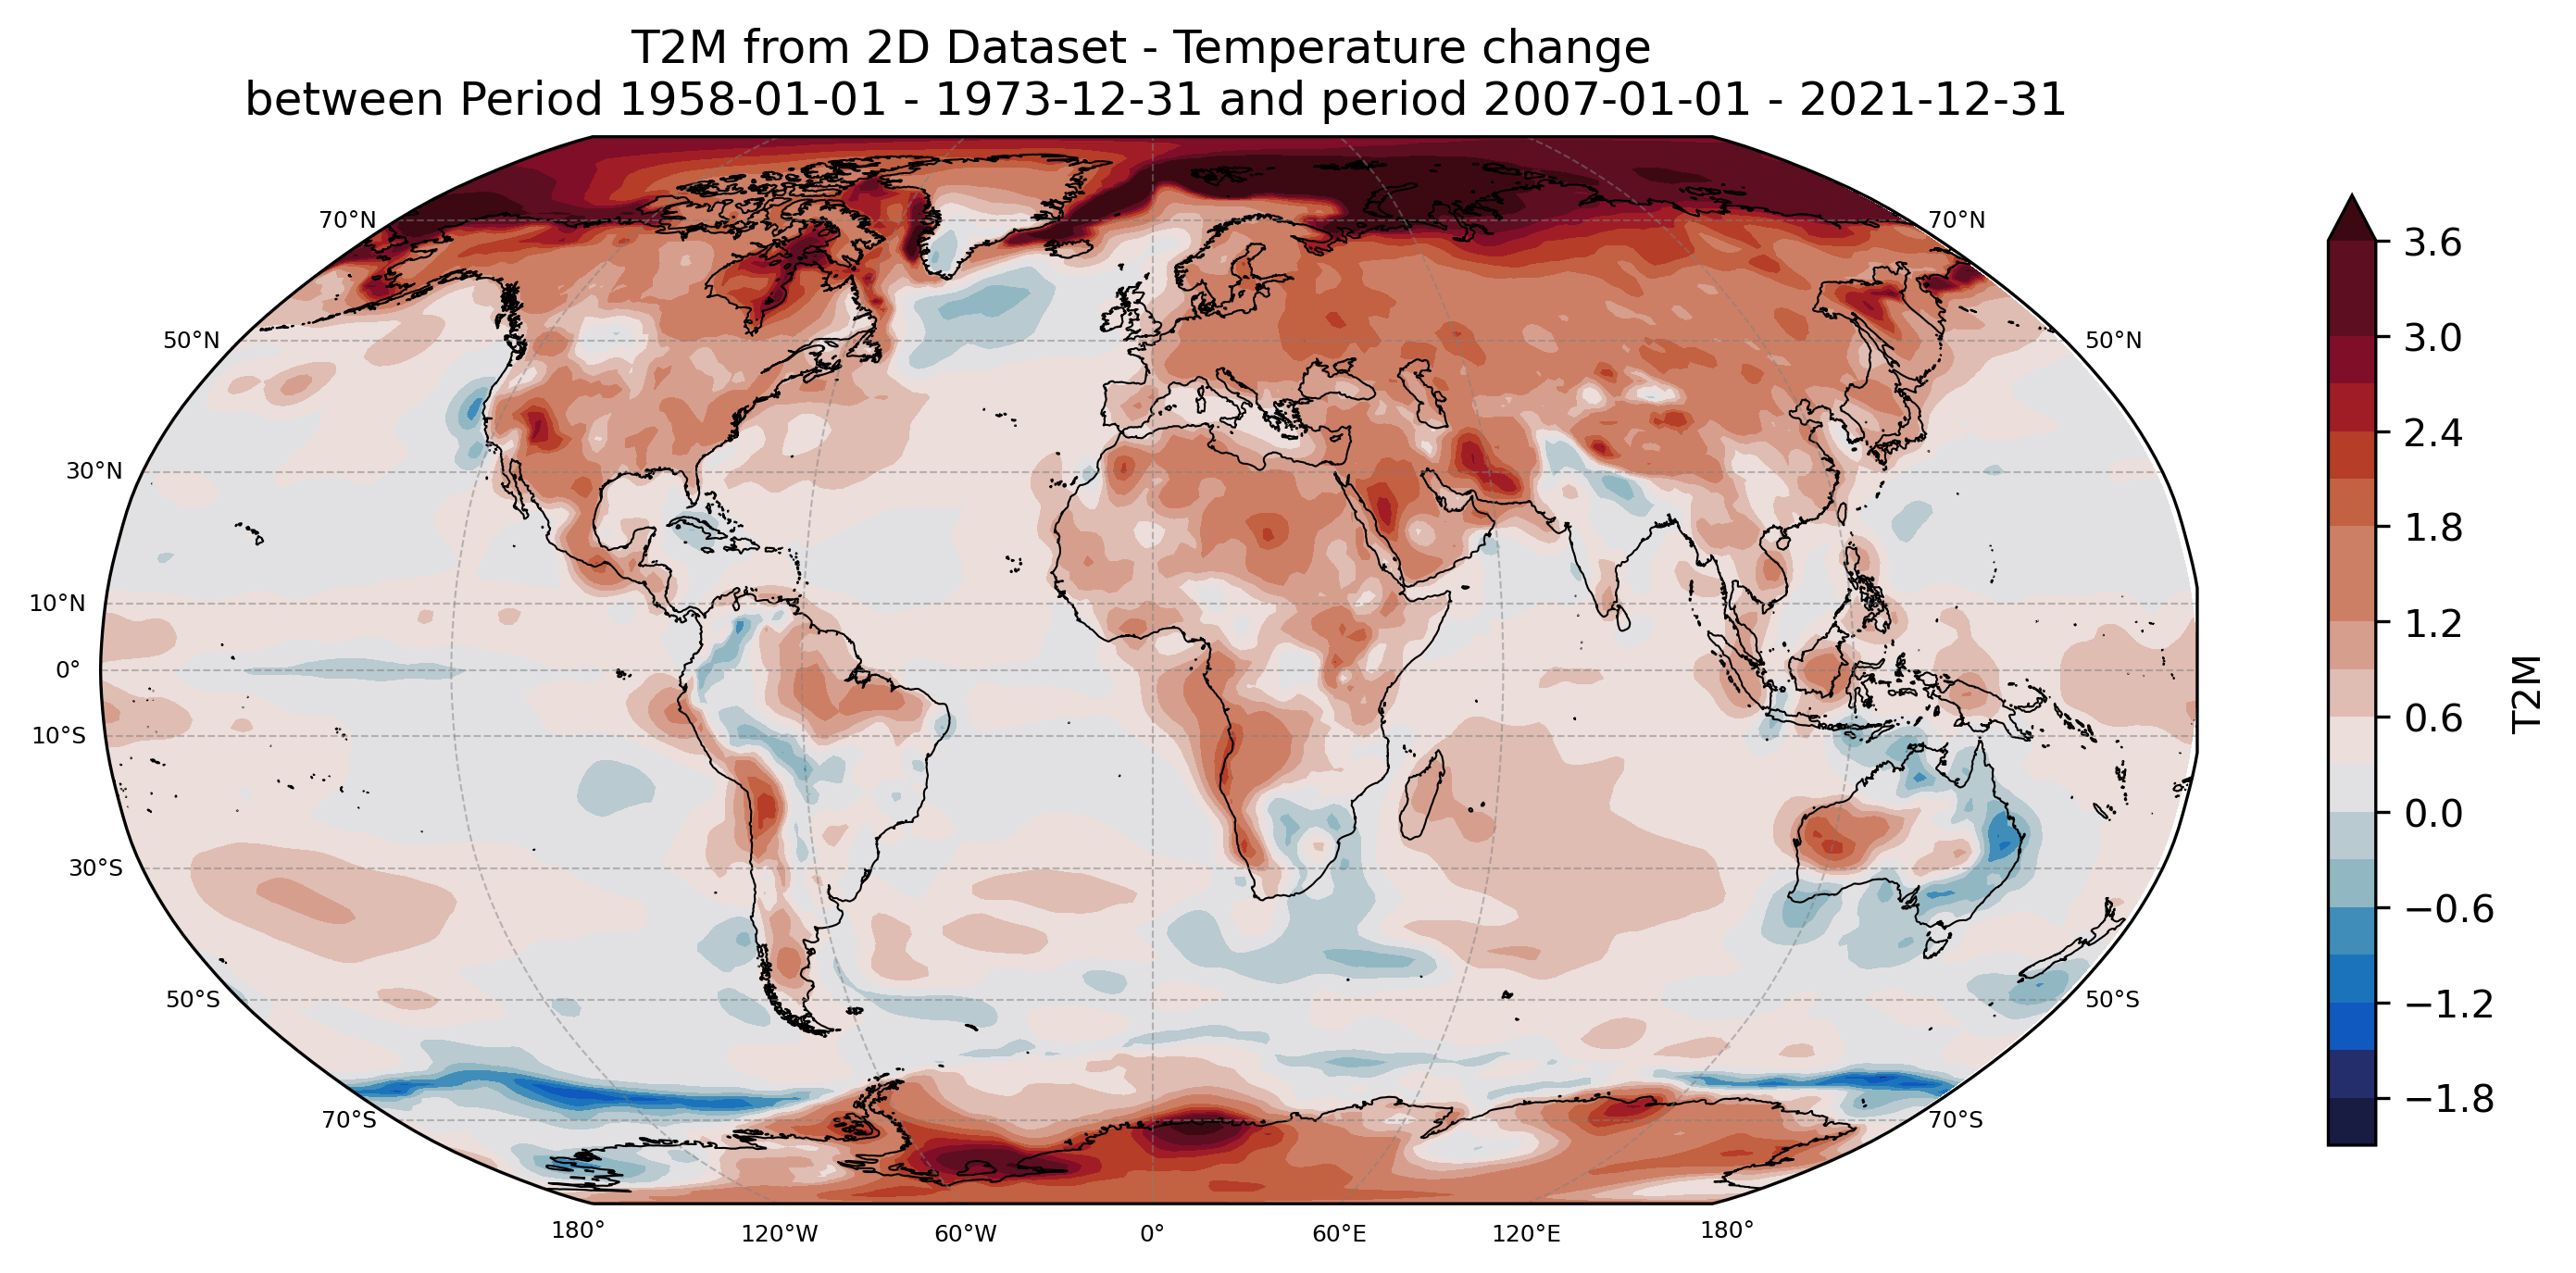

In [33]:
# =======================================================================
#Surface Temps

# Plot T @ T Surface and Timemean
    
fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())

(- time_mean(get_timeframe(Data2D_T.ds.T2M.isel(height = -1),'1958-01-01','1973-12-31')) +
 time_mean(get_timeframe(Data2D_T.ds.T2M.isel(height = -1),'2007-01-01','2021-12-31'))
          ).T.plot.contourf(ax=ax, levels=20, norm=norm(vmax=3.5,vmin=-2),transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_T,cbar_kwargs= cbar_kwargs)

ax.set_title('T2M from 2D Dataset - Temperature change \n between Period 1958-01-01 - 1973-12-31 and period 2007-01-01 - 2021-12-31')
plt.tight_layout()
plt.savefig(RESLOC+RESLOC_SPECIFIC+'T2M_change.png',dpi=400)
plt.show()


In [6]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


In [7]:
# =======================================================================
#Compare Temps

DT_T3D_T2M = -(DS.ds_surface.T - Data2D_T.ds.T2M.isel(height = -1))


DT_T3D_T2M.attrs = DS.ds_surface.T.attrs



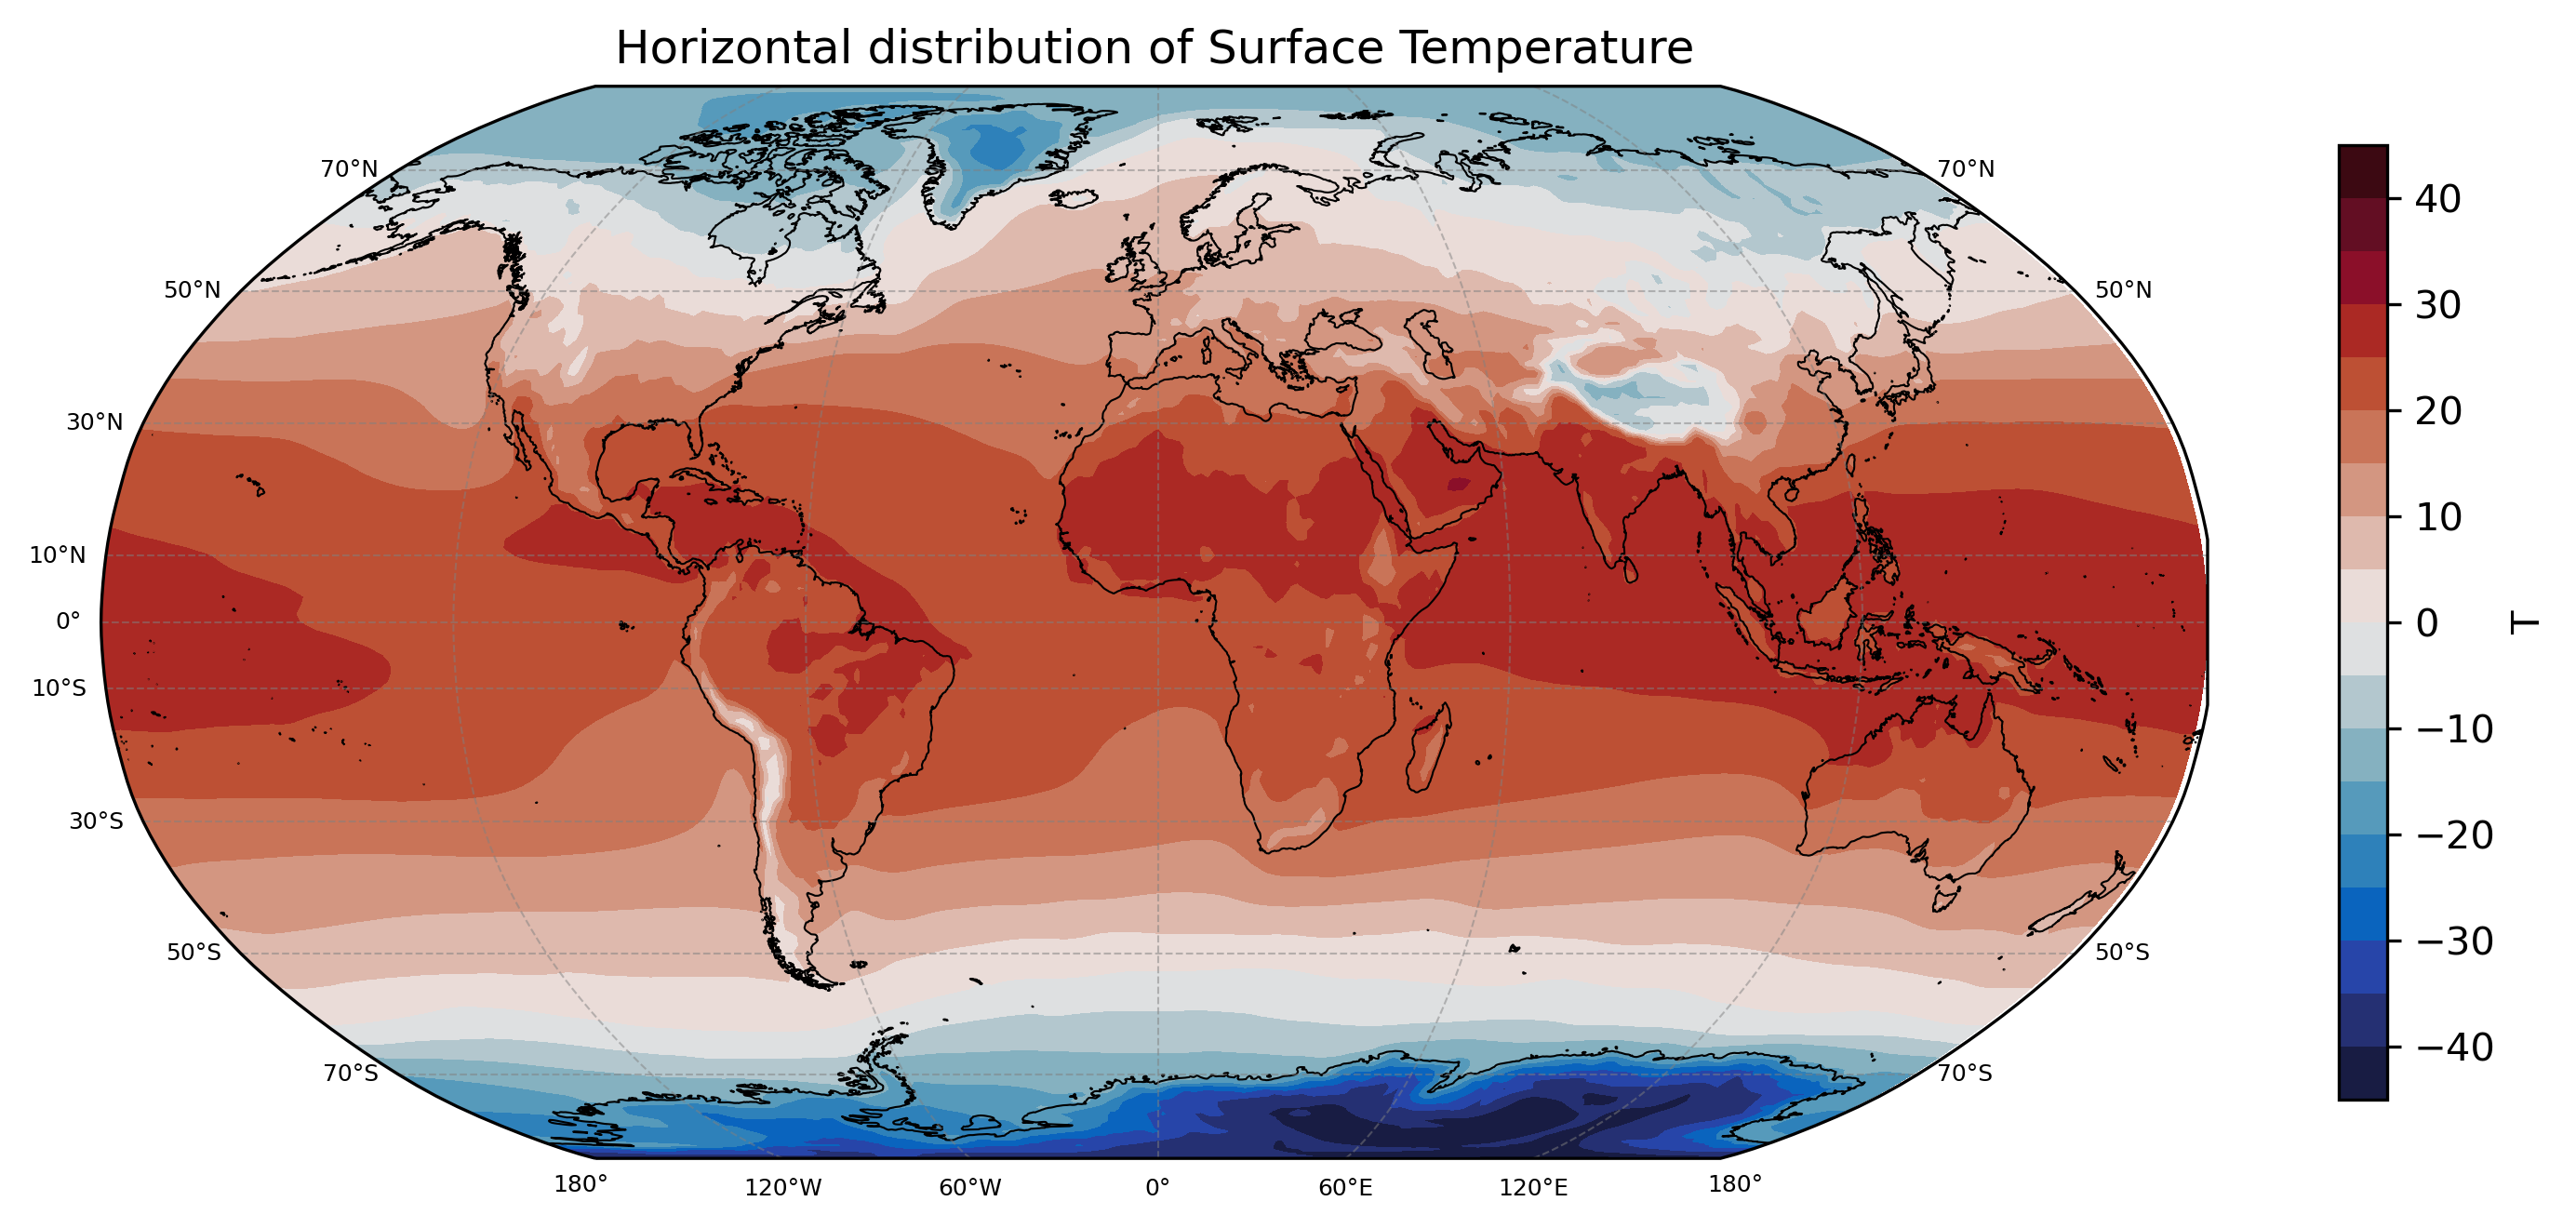

In [8]:
# Plot T @ T Surface and Timemean
    
fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())

K2Deg(time_mean(get_timeframe(DS.ds_surface.T,t2_start,t2_end))).T.plot.contourf(ax=ax, levels=20, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_T,cbar_kwargs= cbar_kwargs)

ax.set_title('Horizontal distribution of Surface Temperature')
plt.tight_layout()
plt.savefig(RESLOC+RESLOC_SPECIFIC+'global_Temp_Distribution_from_3D.png',dpi=400)
plt.show()


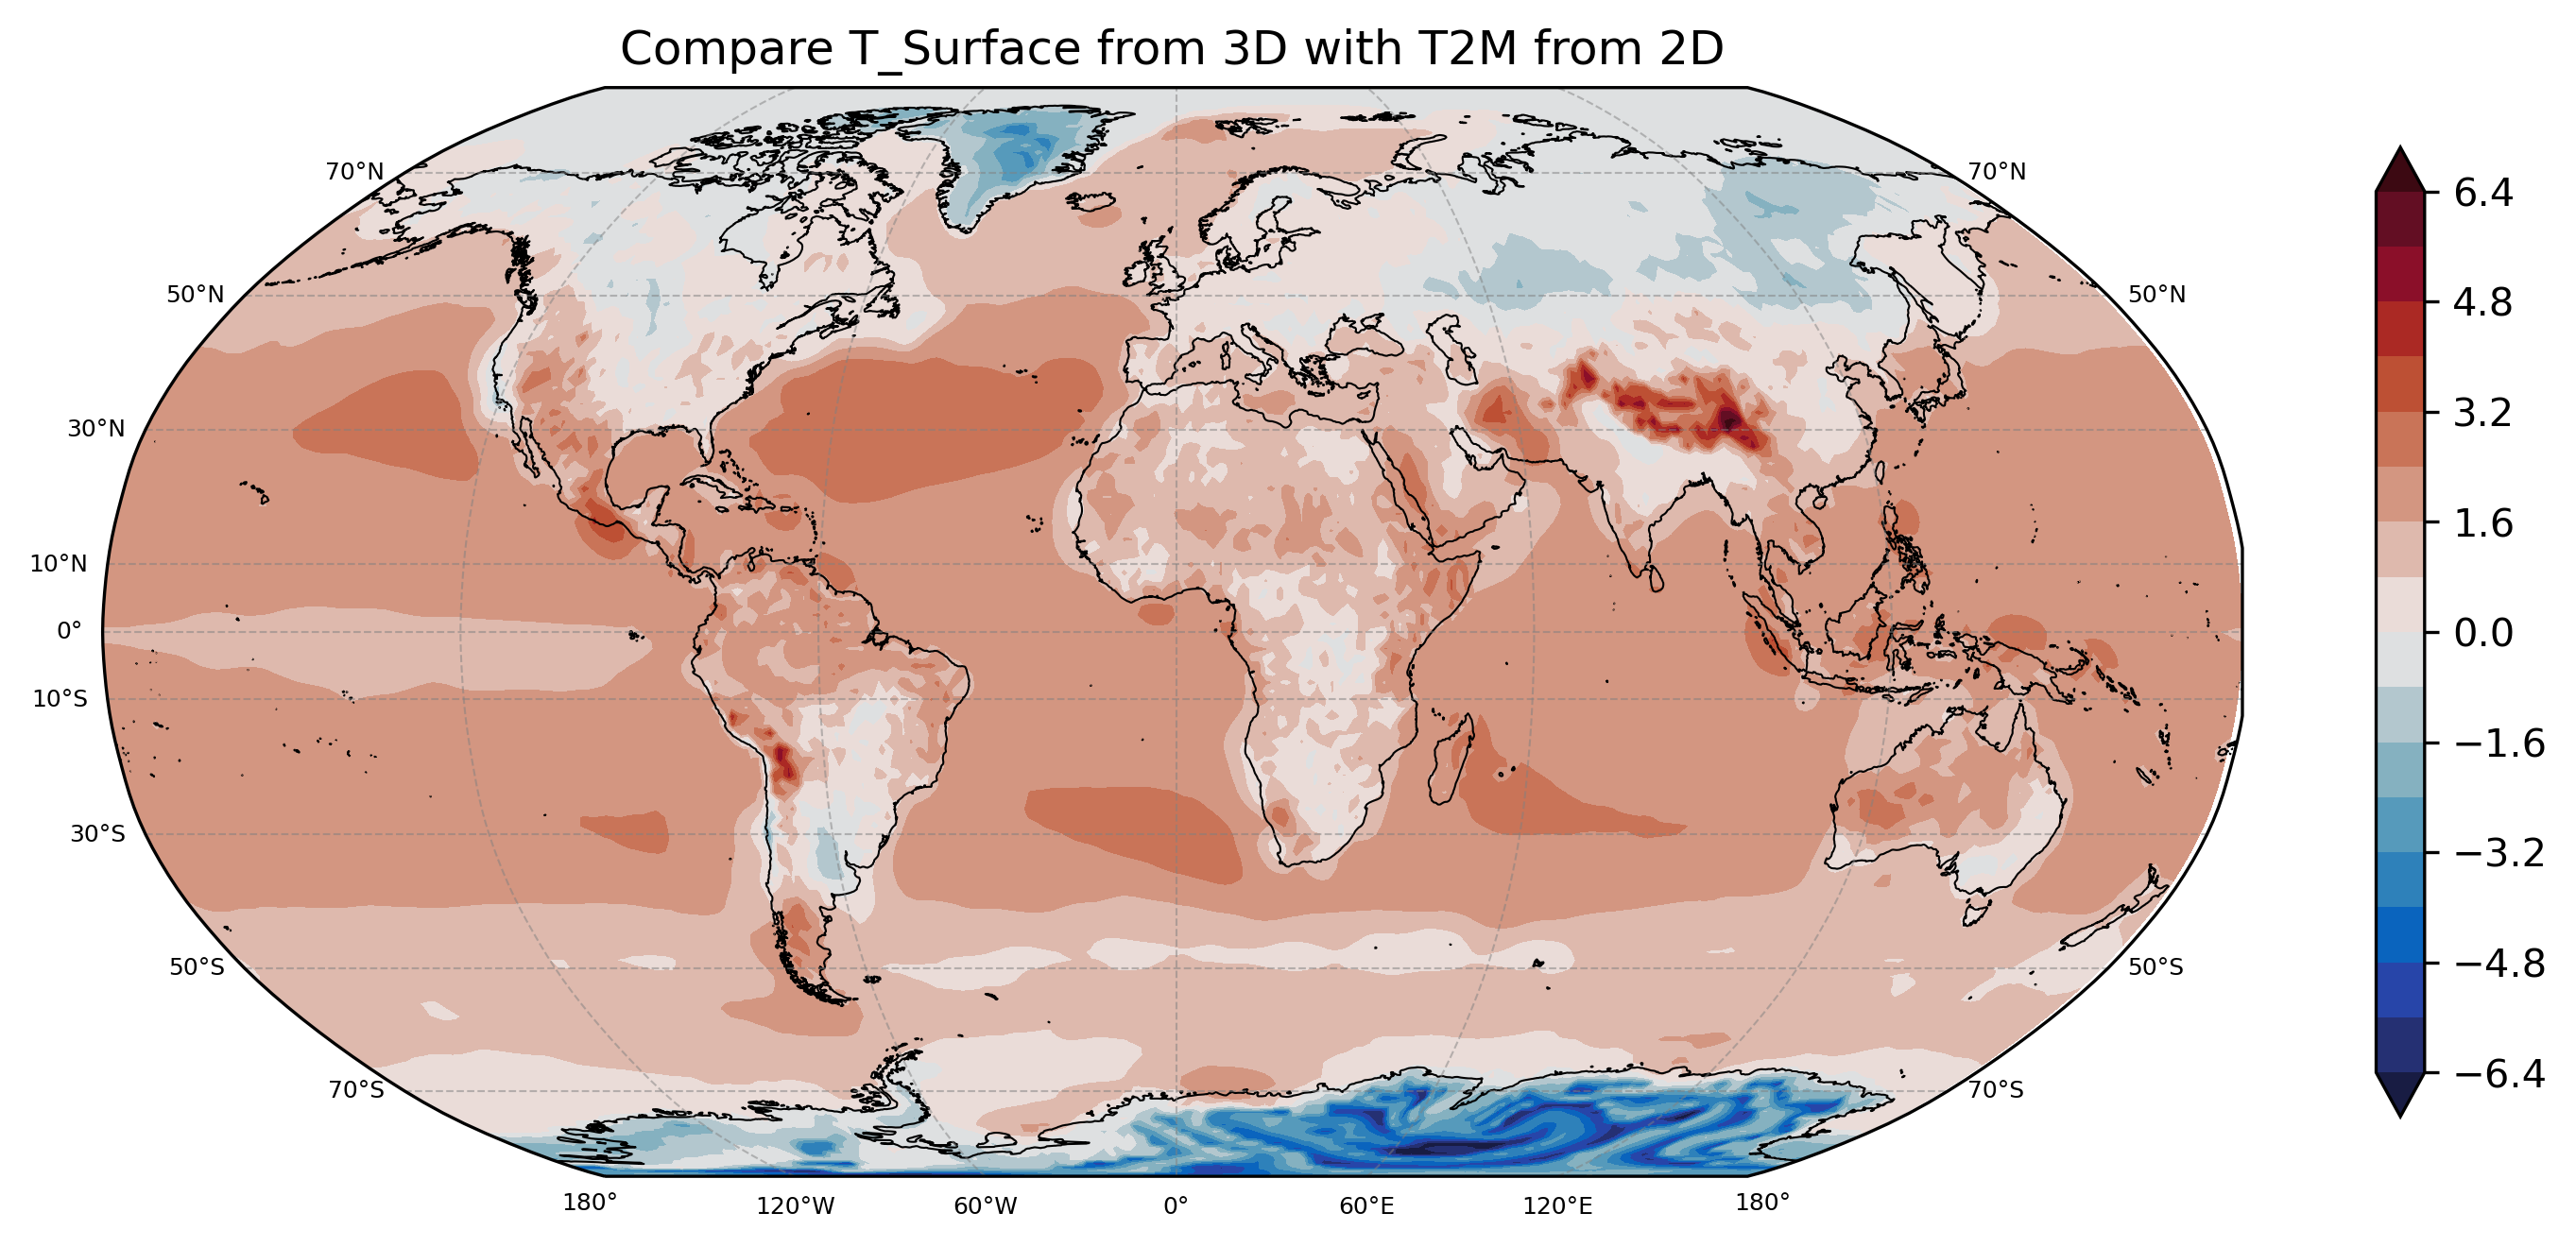

In [19]:
# Plot T @ T Surface and Timemean
    
fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())

time_mean(get_timeframe(DT_T3D_T2M,t2_start,t2_end)).T.plot.contourf(ax=ax, levels=20, norm=norm(vmax=6,vmin=-6),transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_T,cbar_kwargs= cbar_kwargs)

ax.set_title('Compare T_Surface from 3D with T2M from 2D')
plt.tight_layout()
plt.savefig(RESLOC+RESLOC_SPECIFIC+'global_Temp_Distribution_DT_T3D_T2M.png',dpi=400)
plt.show()



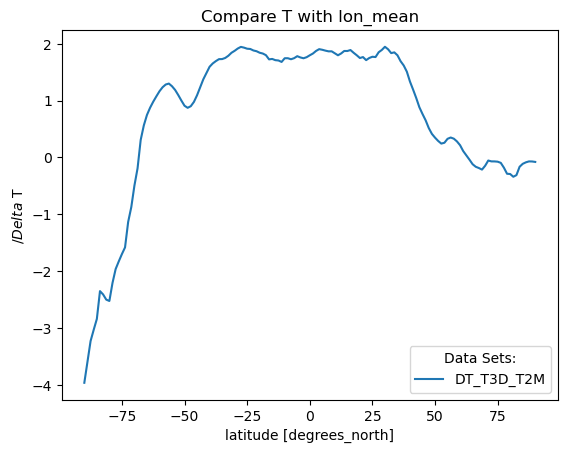

In [10]:

fig, ax = plt.subplots()


time_mean(get_timeframe(lon_mean(DT_T3D_T2M).T,t2_start,t2_end)).plot.line(label = 'DT_T3D_T2M')

ax.set_ylabel('$/Delta$ T')
ax.set_title('Compare T with lon_mean')
ax.legend(title = 'Data Sets:')
plt.savefig(RESLOC+RESLOC_SPECIFIC+'Compare_T_lon_mean.png',dpi=400)
plt.show()


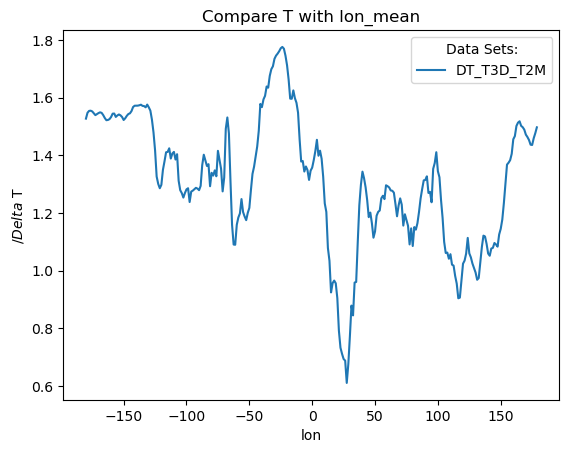

In [11]:
fig, ax = plt.subplots()


time_mean(get_timeframe(lat_mean(DT_T3D_T2M).T,t2_start,t2_end)).plot.line(label = 'DT_T3D_T2M')

ax.set_ylabel('$/Delta$ T')
ax.set_title('Compare T with lon_mean')
ax.legend(title = 'Data Sets:')
plt.savefig(RESLOC+RESLOC_SPECIFIC+'Compare_T_lat_mean.png',dpi=400)
plt.show()

In [12]:
# =======================================================================
#Compare RH

DRH_RH3D_RH2M = -(DS.ds_surface.RH - Data2D_RH.ds.RH2M.isel(height = -1))

DRH_RH3D_RH2M.attrs = DS.ds_surface.RH.attrs

print()


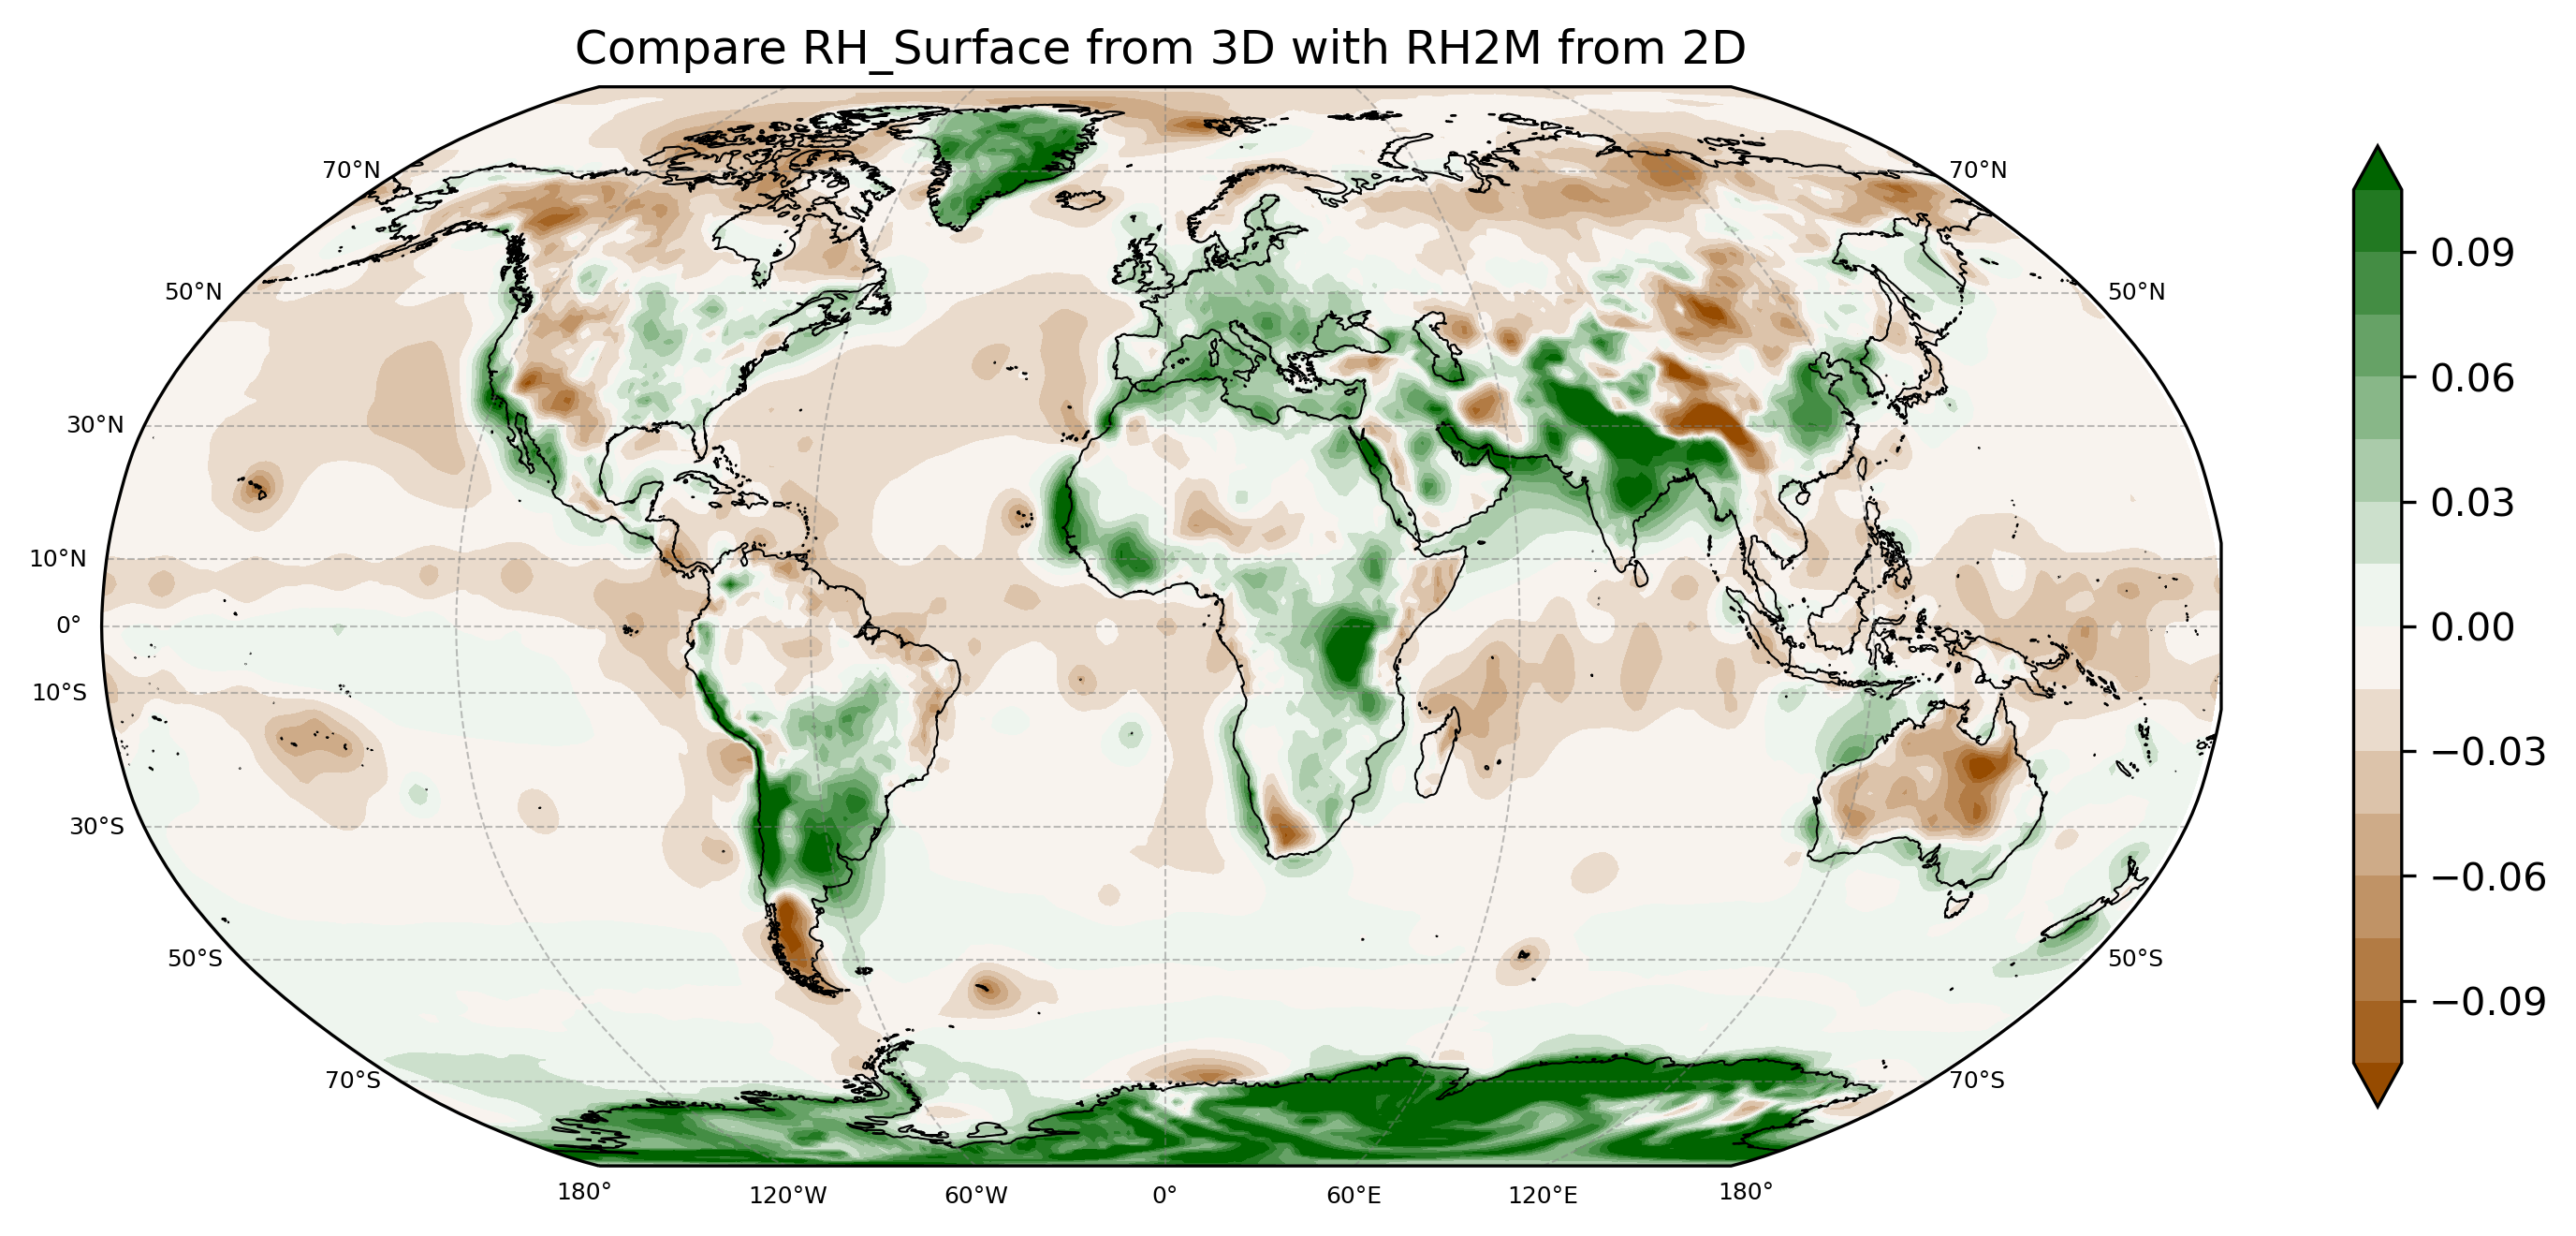

In [21]:

# Plot RH 
    
fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())

time_mean(get_timeframe(DRH_RH3D_RH2M,t2_start,t2_end)).plot.contourf(ax=ax, levels=20,norm=norm(vmax=0.1,vmin=-0.1), transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_RH_change,cbar_kwargs= cbar_kwargs)

ax.set_title('Compare RH_Surface from 3D with RH2M from 2D')
plt.tight_layout()
plt.savefig(RESLOC+RESLOC_SPECIFIC+'global_RH_Distribution_DRH_RH3D_RH2M.png',dpi=400)
plt.show()



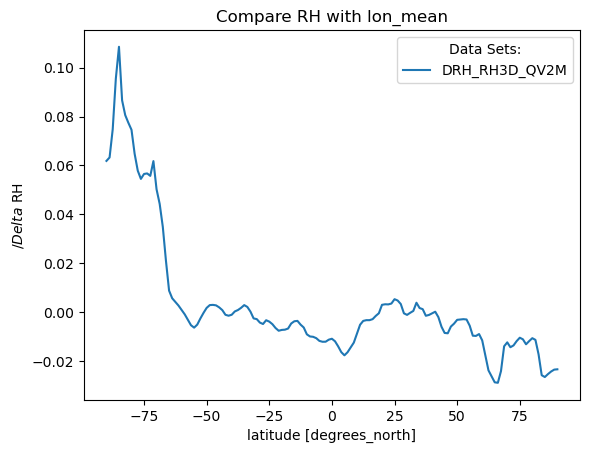

In [14]:
fig, ax = plt.subplots()


time_mean(get_timeframe(lon_mean(DRH_RH3D_RH2M),t2_start,t2_end)).plot.line(label = 'DRH_RH3D_QV2M')

ax.set_ylabel('$/Delta$ RH')
ax.set_title('Compare RH with lon_mean')
ax.legend(title = 'Data Sets:')
plt.savefig(RESLOC+RESLOC_SPECIFIC+'Compare_RH_lon_mean.png',dpi=400)
plt.show()


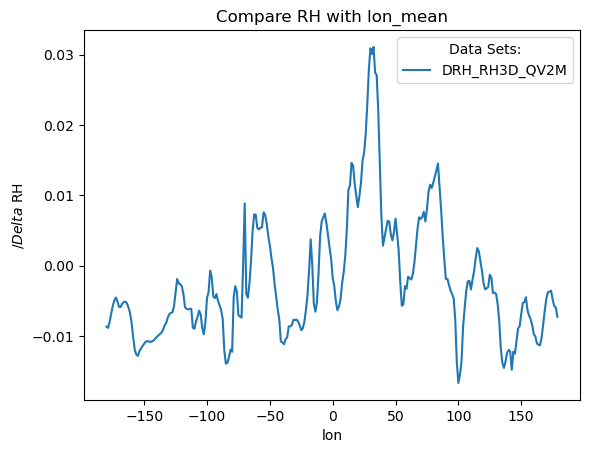

In [15]:
fig, ax = plt.subplots()


time_mean(get_timeframe(lat_mean(DRH_RH3D_RH2M),t2_start,t2_end)).plot.line(label = 'DRH_RH3D_QV2M')

ax.set_ylabel('$/Delta$ RH')
ax.set_title('Compare RH with lon_mean')
ax.legend(title = 'Data Sets:')
plt.savefig(RESLOC+RESLOC_SPECIFIC+'Compare_RH_lat_mean.png',dpi=400)
plt.show()
